<h1 align="center">INFOSYS SPRINGBOARD INTERNSHIP</h1>
<h1 align="center">MileStone 3</h1>
<H3 align="right">Name: Rudrani Ghosh</H3>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("/Users/rudranighosh/Downloads/Healthcare Providers.csv")
data.head()

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


In [2]:
# information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  object 
 3   First Name of the Provider                                95745 non-null   object 
 4   Middle Initial of the Provider                            70669 non-null   object 
 5   Credentials of the Provider                               92791 non-null   object 
 6   Gender of the Provider                                    95746 non-null   object 
 7   Entity Type of the Provider                               100000 non-null  object 
 8   Stree

In [3]:
irrelevant_columns=['Entity Type of the Provider',
                    'Street Address 1 of the Provider',
                    'Street Address 2 of the Provider',
                    'Zip Code of the Provider',
                    'Medicare Participation Indicator',
                    'Place of Service',
                    'HCPCS Code',
                    'HCPCS Description',
                    'HCPCS Drug Indicator',
                    'Country Code of the Provider']

data=data.drop(columns=irrelevant_columns)


Columns that have no relevance in our assignment have been dropped

In [4]:
data.head()

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,City of the Provider,State Code of the Provider,Provider Type,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,SAINT LOUIS,MO,Internal Medicine,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,FAYETTEVILLE,NC,Obstetrics & Gynecology,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,NORTH HAVEN,CT,Podiatry,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,KANSAS CITY,MO,Internal Medicine,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,JUPITER,FL,Internal Medicine,33,24,31,26.52,40,19.539393939,19.057575758


<h2>Data Preprocessing </h2>

In [5]:
# Merging the name columns into a single column 
data['Full Name'] = data['First Name of the Provider'].fillna('') + ' ' + \
                    data['Middle Initial of the Provider'].fillna('') + ' ' + \
                    data['Last Name/Organization Name of the Provider'].fillna('')
data['Full Name'] = data['Full Name'].str.strip()

data = data.drop(columns=['Last Name/Organization Name of the Provider', 
                          'First Name of the Provider', 
                          'Middle Initial of the Provider'])

full_name_column = data.pop('Full Name')

data.insert(1, 'Full Name', full_name_column)


data.head()

,index,Full Name,National Provider Identifier,Credentials of the Provider,Gender of the Provider,City of the Provider,State Code of the Provider,Provider Type,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,SATYASREE UPADHYAYULA,1891106191,M.D.,F,SAINT LOUIS,MO,Internal Medicine,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,WENDY P JONES,1346202256,M.D.,F,FAYETTEVILLE,NC,Obstetrics & Gynecology,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,RICHARD W DUROCHER,1306820956,DPM,M,NORTH HAVEN,CT,Podiatry,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,JASPER FULLARD,1770523540,MD,M,KANSAS CITY,MO,Internal Medicine,20,18,20,3.5,5,3.43,3.43
4,746159,ANTHONY E PERROTTI,1073627758,DO,M,JUPITER,FL,Internal Medicine,33,24,31,26.52,40,19.539393939,19.057575758


A new column "Full Name" has been created to merge first name, middle name and last name

In [6]:
# Uniform format of credentials
data['Credentials of the Provider'] = data['Credentials of the Provider'].str.replace(r'\.', '', regex=True).str.upper()
data.head()

,index,Full Name,National Provider Identifier,Credentials of the Provider,Gender of the Provider,City of the Provider,State Code of the Provider,Provider Type,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,SATYASREE UPADHYAYULA,1891106191,MD,F,SAINT LOUIS,MO,Internal Medicine,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,WENDY P JONES,1346202256,MD,F,FAYETTEVILLE,NC,Obstetrics & Gynecology,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,RICHARD W DUROCHER,1306820956,DPM,M,NORTH HAVEN,CT,Podiatry,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,JASPER FULLARD,1770523540,MD,M,KANSAS CITY,MO,Internal Medicine,20,18,20,3.5,5,3.43,3.43
4,746159,ANTHONY E PERROTTI,1073627758,DO,M,JUPITER,FL,Internal Medicine,33,24,31,26.52,40,19.539393939,19.057575758


"Credentials of the Provider" column now follows a uniform format. Such that MD and M.D and M.D. are all treated as the same unit

<h2>Converting Object to Numeric Type </h2>

In [7]:
numeric_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'
]

for column in numeric_columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')
    
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   Full Name                                                 100000 non-null  object 
 2   National Provider Identifier                              100000 non-null  int64  
 3   Credentials of the Provider                               92791 non-null   object 
 4   Gender of the Provider                                    95746 non-null   object 
 5   City of the Provider                                      100000 non-null  object 
 6   State Code of the Provider                                100000 non-null  object 
 7   Provider Type                                             100000 non-null  object 
 8   Numbe

<h2>Looking for Missing Values and imputing them with Mean </h2>

In [8]:
# missing values
print(data.isnull().sum())


index                                                          0
Full Name                                                      0
National Provider Identifier                                   0
Credentials of the Provider                                 7209
Gender of the Provider                                      4254
City of the Provider                                           0
State Code of the Provider                                     0
Provider Type                                                  0
Number of Services                                          2653
Number of Medicare Beneficiaries                             405
Number of Distinct Medicare Beneficiary/Per Day Services    1500
Average Medicare Allowed Amount                              745
Average Submitted Charge Amount                             6723
Average Medicare Payment Amount                              466
Average Medicare Standardized Amount                         470
dtype: int64


In [9]:
# Imputation of numeric missing values with mean
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

print(data.isnull().sum())

index                                                          0
Full Name                                                      0
National Provider Identifier                                   0
Credentials of the Provider                                 7209
Gender of the Provider                                      4254
City of the Provider                                           0
State Code of the Provider                                     0
Provider Type                                                  0
Number of Services                                             0
Number of Medicare Beneficiaries                               0
Number of Distinct Medicare Beneficiary/Per Day Services       0
Average Medicare Allowed Amount                                0
Average Submitted Charge Amount                                0
Average Medicare Payment Amount                                0
Average Medicare Standardized Amount                           0
dtype: int64


<h2>Imputation of categorical columns with mode</h2>

In [10]:
categorical_columns = ['Credentials of the Provider',
                   'Gender of the Provider',
                   'City of the Provider',
                  'State Code of the Provider']

for column in categorical_columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

print(data.isnull().sum())


index                                                       0
Full Name                                                   0
National Provider Identifier                                0
Credentials of the Provider                                 0
Gender of the Provider                                      0
City of the Provider                                        0
State Code of the Provider                                  0
Provider Type                                               0
Number of Services                                          0
Number of Medicare Beneficiaries                            0
Number of Distinct Medicare Beneficiary/Per Day Services    0
Average Medicare Allowed Amount                             0
Average Submitted Charge Amount                             0
Average Medicare Payment Amount                             0
Average Medicare Standardized Amount                        0
dtype: int64


<h2>Looking for Duplicate Values </h2>

In [11]:
# Check for duplicates
print(data.duplicated().sum())


0


In [12]:
data.head()

,index,Full Name,National Provider Identifier,Credentials of the Provider,Gender of the Provider,City of the Provider,State Code of the Provider,Provider Type,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,SATYASREE UPADHYAYULA,1891106191,MD,F,SAINT LOUIS,MO,Internal Medicine,27.0,24.0,27.0,200.587778,305.211111,157.262222,160.908889
1,3354385,WENDY P JONES,1346202256,MD,F,FAYETTEVILLE,NC,Obstetrics & Gynecology,175.0,175.0,175.0,123.730000,548.800000,118.830000,135.315257
2,3001884,RICHARD W DUROCHER,1306820956,DPM,M,NORTH HAVEN,CT,Podiatry,32.0,13.0,32.0,90.650000,155.000000,64.439688,60.595937
3,7594822,JASPER FULLARD,1770523540,MD,M,KANSAS CITY,MO,Internal Medicine,20.0,18.0,20.0,3.500000,5.000000,3.430000,3.430000
4,746159,ANTHONY E PERROTTI,1073627758,DO,M,JUPITER,FL,Internal Medicine,33.0,24.0,31.0,26.520000,40.000000,19.539394,19.057576


<h2>Encoding some Categorical Columns using Frequency Encoder</h2>

In [13]:
def frequency_encode(df, columns):
    for column in columns:
        freq_encoding = df[column].value_counts() / len(df)
        new_column_name = column + '_Freq'
        df.insert(df.columns.get_loc(column) + 1, new_column_name, df[column].map(freq_encoding))
    return df

columns_to_encode=['Credentials of the Provider',
                   'Gender of the Provider',
                   'Provider Type',
                  'State Code of the Provider']

data = frequency_encode(data, columns_to_encode)

df=data

data.head()

,index,Full Name,National Provider Identifier,Credentials of the Provider,Credentials of the Provider_Freq,Gender of the Provider,Gender of the Provider_Freq,City of the Provider,State Code of the Provider,State Code of the Provider_Freq,Provider Type,Provider Type_Freq,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,SATYASREE UPADHYAYULA,1891106191,MD,0.73827,F,0.29105,SAINT LOUIS,MO,0.01997,Internal Medicine,0.11366,27.0,24.0,27.0,200.587778,305.211111,157.262222,160.908889
1,3354385,WENDY P JONES,1346202256,MD,0.73827,F,0.29105,FAYETTEVILLE,NC,0.03725,Obstetrics & Gynecology,0.01028,175.0,175.0,175.0,123.730000,548.800000,118.830000,135.315257
2,3001884,RICHARD W DUROCHER,1306820956,DPM,0.01915,M,0.70895,NORTH HAVEN,CT,0.01403,Podiatry,0.02027,32.0,13.0,32.0,90.650000,155.000000,64.439688,60.595937
3,7594822,JASPER FULLARD,1770523540,MD,0.73827,M,0.70895,KANSAS CITY,MO,0.01997,Internal Medicine,0.11366,20.0,18.0,20.0,3.500000,5.000000,3.430000,3.430000
4,746159,ANTHONY E PERROTTI,1073627758,DO,0.06176,M,0.70895,JUPITER,FL,0.07263,Internal Medicine,0.11366,33.0,24.0,31.0,26.520000,40.000000,19.539394,19.057576


In [14]:
df.columns

Index(['index', 'Full Name', 'National Provider Identifier',
       'Credentials of the Provider', 'Credentials of the Provider_Freq',
       'Gender of the Provider', 'Gender of the Provider_Freq',
       'City of the Provider', 'State Code of the Provider',
       'State Code of the Provider_Freq', 'Provider Type',
       'Provider Type_Freq', 'Number of Services',
       'Number of Medicare Beneficiaries',
       'Number of Distinct Medicare Beneficiary/Per Day Services',
       'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
       'Average Medicare Payment Amount',
       'Average Medicare Standardized Amount'],
      dtype='object')

<h2>Performing Standardization on Numerical Columns</h2>

In [15]:
from sklearn.preprocessing import StandardScaler

data_copy=data.copy()

standardization_columns=['Number of Services',
                         'Number of Medicare Beneficiaries',
                         'Number of Distinct Medicare Beneficiary/Per Day Services',
                         'Average Medicare Allowed Amount',
                         'Average Submitted Charge Amount',
                         'Average Medicare Payment Amount',
                         'Average Medicare Standardized Amount',
                         'Credentials of the Provider_Freq',
                         'Gender of the Provider_Freq',
                         'State Code of the Provider_Freq' ]

# Standardization
standard_scaler = StandardScaler()
data[standardization_columns] = standard_scaler.fit_transform(data[standardization_columns])



print("Standardized DataFrame:")
data.head()

Standardized DataFrame:


,index,Full Name,National Provider Identifier,Credentials of the Provider,Credentials of the Provider_Freq,Gender of the Provider,Gender of the Provider_Freq,City of the Provider,State Code of the Provider,State Code of the Provider_Freq,Provider Type,Provider Type_Freq,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,SATYASREE UPADHYAYULA,1891106191,MD,0.594983,F,-1.560716,SAINT LOUIS,MO,-0.737342,Internal Medicine,0.11366,-0.497577,-0.444753,-0.482232,1.098226,0.621012,0.972452,1.003321
1,3354385,WENDY P JONES,1346202256,MD,0.594983,F,-1.560716,FAYETTEVILLE,NC,-0.004973,Obstetrics & Gynecology,0.01028,0.503328,1.040098,0.554599,0.352134,1.940981,0.549955,0.722789
2,3001884,RICHARD W DUROCHER,1306820956,DPM,-1.684316,M,0.640731,NORTH HAVEN,CT,-0.989093,Podiatry,0.02027,-0.463762,-0.552921,-0.447204,0.031012,-0.192958,-0.047975,-0.096209
3,7594822,JASPER FULLARD,1770523540,MD,0.594983,M,0.640731,KANSAS CITY,MO,-0.737342,Internal Medicine,0.11366,-0.544917,-0.503753,-0.531272,-0.814992,-1.005784,-0.718674,-0.722804
4,746159,ANTHONY E PERROTTI,1073627758,DO,-1.549260,M,0.640731,JUPITER,FL,1.494517,Internal Medicine,0.11366,-0.456999,-0.444753,-0.454210,-0.591527,-0.816125,-0.541578,-0.551510


<H2>FINAL DATASET </H2>

In [16]:

anomaly_detection_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount',
    'Credentials of the Provider_Freq',
    'Gender of the Provider_Freq',
    'State Code of the Provider_Freq', 
    'Provider Type_Freq'
]

X = data[anomaly_detection_columns]

X

,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Credentials of the Provider_Freq,Gender of the Provider_Freq,State Code of the Provider_Freq,Provider Type_Freq
0,-0.497577,-0.444753,-0.482232,1.098226,0.621012,0.972452,1.003321,0.594983,-1.560716,-0.737342,0.11366
1,0.503328,1.040098,0.554599,0.352134,1.940981,0.549955,0.722789,0.594983,-1.560716,-0.004973,0.01028
2,-0.463762,-0.552921,-0.447204,0.031012,-0.192958,-0.047975,-0.096209,-1.684316,0.640731,-0.989093,0.02027
3,-0.544917,-0.503753,-0.531272,-0.814992,-1.005784,-0.718674,-0.722804,0.594983,0.640731,-0.737342,0.11366
4,-0.456999,-0.444753,-0.454210,-0.591527,-0.816125,-0.541578,-0.551510,-1.549260,0.640731,1.494517,0.11366
...,...,...,...,...,...,...,...,...,...,...,...
99995,-0.544917,-0.484087,-0.531272,-0.020219,0.126753,-0.088807,-0.078095,-1.709831,-1.560716,0.142517,0.02780
99996,0.239576,0.371423,0.281380,-0.254193,-0.252286,-0.426514,-0.354403,-1.729577,-1.560716,-1.140399,0.05713
99997,-0.605783,-0.572588,-0.594322,-0.674428,-0.439269,-0.601485,-0.600151,0.594983,0.640731,-0.737342,0.04602
99998,-0.599020,-0.562754,-0.587316,-0.552503,-0.680654,-0.427351,-0.482868,0.594983,-1.560716,1.112228,0.11366


<H2>ISOLATION FOREST</H2>

In [20]:
from sklearn.ensemble import IsolationForest

# Isolation Forest
isolation_forest = IsolationForest(contamination=0.005, random_state=0)
isolation_forest.fit(X)
data['IsolationForest'] = isolation_forest.predict(X)
data['IsolationForest'] = data['IsolationForest'].map({1: 0, -1: 1})
print("Isolation Forest anomalies detected:", data['IsolationForest'].sum())


Isolation Forest anomalies detected: 500


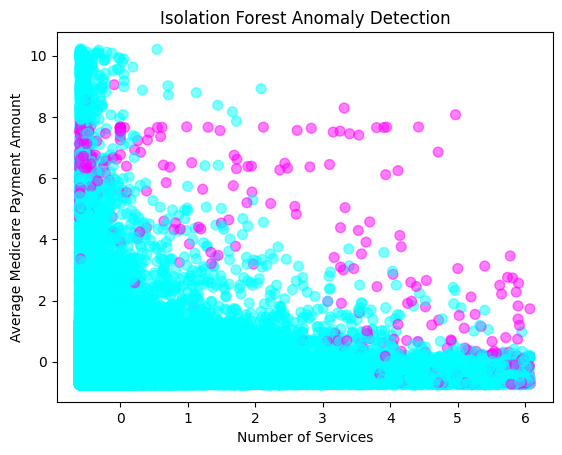

In [21]:
# Scatter plot between 'Number of Services' and 'Average Medicare Payment Amount'
plt.scatter(data['Number of Services'], data['Average Medicare Payment Amount'], 
            c=data['IsolationForest'], cmap='cool', s=50, alpha=0.5)
plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('Number of Services')
plt.ylabel('Average Medicare Payment Amount')
plt.show()


<H3>Using contamination as 0.005 and random_state as 0, the Isolation Forest model detected 500 anomalies </H3>

<h3> SHAP ANALYSIS OF IsolationForest Model</h3>

In [23]:
import shap
from sklearn.ensemble import IsolationForest

# SHAP model's output
explainer = shap.Explainer(isolation_forest, X)
shap_values = explainer(X)


100%|===================| 99764/100000 [06:32<00:00]        

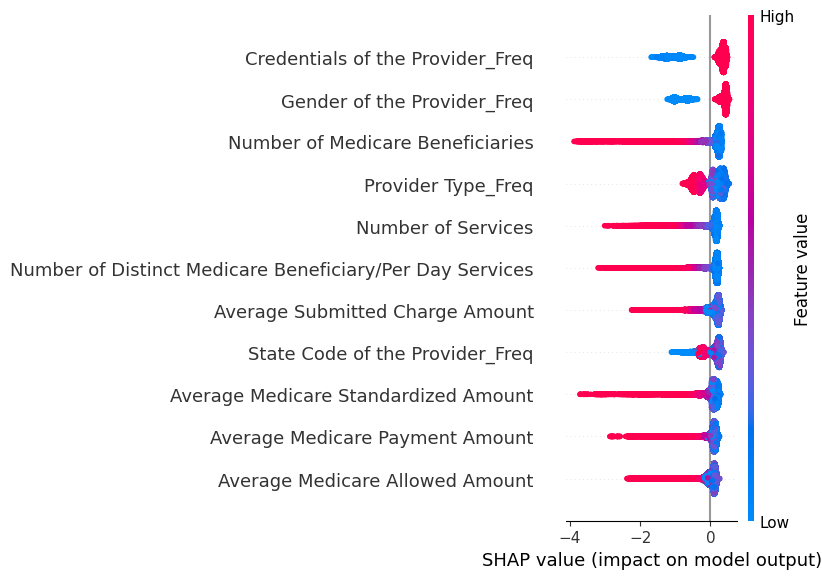

In [24]:
# SHAP summary plot
shap.summary_plot(shap_values, X, feature_names=anomaly_detection_columns)


<h3>INTERPRETATION</h3>
- The following columns tend to negatively affect the output: 
<li>'Number of Services',</li>
    <li>'Number of Medicare Beneficiaries',</li>
    <li>'Number of Distinct Medicare Beneficiary/Per Day Services', </li>
    <li>'Average Medicare Allowed Amount',</li>
    <li>'Average Medicare Payment Amount',</li>
    <li>'Average Medicare Standardized Amount',</li>
     <br>
- this shows the tendency of fraud increases with higher values in such columns <br>


---

<br>

<H2>ELLIPTIC ENVELOPE</H2>

In [17]:
from sklearn.covariance import EllipticEnvelope

# Elliptic Envelope
elliptic_envelope = EllipticEnvelope(contamination=0.007, random_state=42)
elliptic_envelope.fit(X)
data['EllipticEnvelope'] = elliptic_envelope.predict(X)
data['EllipticEnvelope'] = data['EllipticEnvelope'].map({1: 0, -1: 1})
print("Elliptic Envelope anomalies detected:", data['EllipticEnvelope'].sum())



Elliptic Envelope anomalies detected: 700


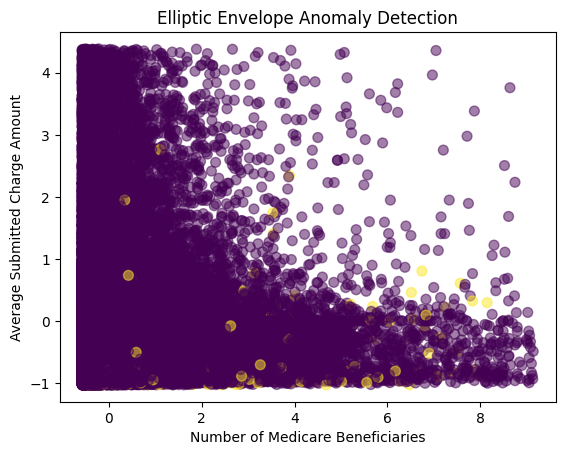

In [28]:
plt.scatter(data['Number of Medicare Beneficiaries'], data['Average Submitted Charge Amount'], 
            c=data['EllipticEnvelope'], cmap='viridis', s=50, alpha=0.5)
plt.title('Elliptic Envelope Anomaly Detection')
plt.xlabel('Number of Medicare Beneficiaries')
plt.ylabel('Average Submitted Charge Amount')
plt.show()


<H3>Using contamination as 0.007 and random_state as 42, the Elliptic Envelope model detected 700 anomalies </H3>

<h2>SHAP ANALYSIS OF EllipticEnvelope in combination with  IsolationForest</h2>

100%|█████████████████████████████████| 100000/100000 [1:22:16<00:00, 20.26it/s]


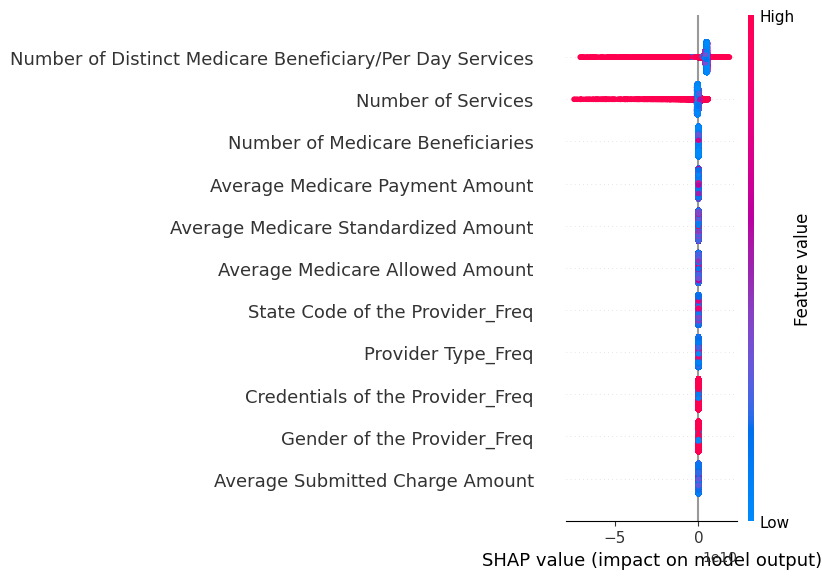

In [20]:
import shap

K = 10  
background_data = shap.sample(X, K)

# Initializing SHAP explainer with sampled background data
explainer = shap.KernelExplainer(elliptic_envelope.decision_function, background_data)

# Compute SHAP values
shap_values = explainer.shap_values(X)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X, feature_names=anomaly_detection_columns)


<h3>INTERPRETATION</h3>
- Higher Number of Services tends to negatively affect the output, this shows the tendency of fraud increases with increase in number of services <br>
- 'Number of Distinct Medicare Beneficiary/Per Day Services' also tends to negatively affect the output, this means the tendency of fraud increases with increase in Number of Distinct Medicare Beneficiary/Per Day Services

---

<br>


<h2>ONE CLASS SVM</h2>

In [17]:
from sklearn.svm import OneClassSVM

# One-Class SVM
one_class_svm = OneClassSVM(gamma='auto', nu=0.01)
one_class_svm.fit(X)
data['OneClassSVM'] = one_class_svm.predict(X)
data['OneClassSVM'] = data['OneClassSVM'].map({1: 0, -1: 1})
print("One-Class SVM anomalies detected:", data['OneClassSVM'].sum())



One-Class SVM anomalies detected: 1012


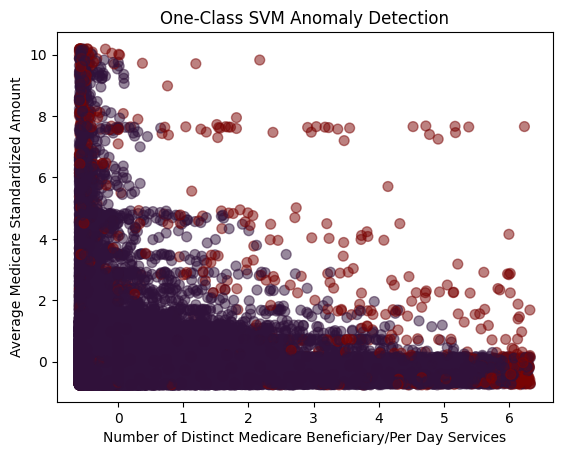

In [18]:
plt.scatter(data['Number of Distinct Medicare Beneficiary/Per Day Services'], data['Average Medicare Standardized Amount'], 
            c=data['OneClassSVM'], cmap='turbo', s=50, alpha=0.5)
plt.title('One-Class SVM Anomaly Detection')
plt.xlabel('Number of Distinct Medicare Beneficiary/Per Day Services')
plt.ylabel('Average Medicare Standardized Amount')
plt.show()


<H3>Using One-Class SVM model and setting gamma as 'auto' and nu as 0.01, 1012 anomalies have been detected</H3>

<h2>SHAP ANALYSIS OF OneClassSVM in combination with  IsolationForest </h2>

100%|===================| 99922/100000 [06:42<00:00]        

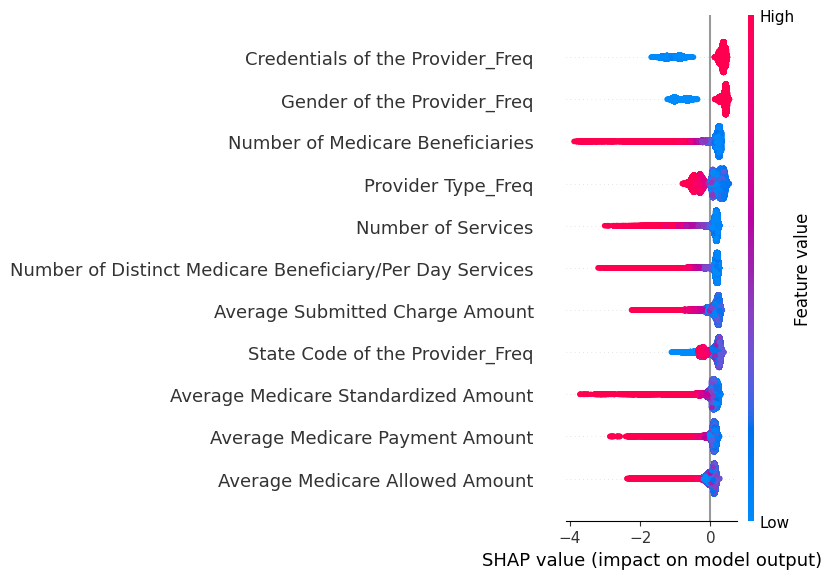

In [19]:
import shap
from sklearn.ensemble import IsolationForest

# Convert predictions to binary labels
data['OneClassSVM'] = data['OneClassSVM'].apply(lambda x: 1 if x == -1 else 0)

# Fit the Isolation Forest model
isolation_forest = IsolationForest(contamination=0.005, random_state=0)
isolation_forest.fit(X)

# Perform SHAP analysis on the Isolation Forest model
explainer = shap.Explainer(isolation_forest, X)
shap_values = explainer(X)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X, feature_names=anomaly_detection_columns)


<h3>INTERPRETATION</h3>
- The following columns tend to negatively affect the output: 
<li>'Number of Services',</li>
    <li>'Number of Medicare Beneficiaries',</li>
    <li>'Number of Distinct Medicare Beneficiary/Per Day Services', </li>
    <li>'Average Medicare Allowed Amount',</li>
    <li>'Average Medicare Payment Amount',</li>
    <li>'Average Medicare Standardized Amount',</li>
     <br>
- this shows the tendency of fraud increases with higher values in such columns <br>


---

<H2>FURTHER INTERPRETATION :</H2>

<h3>The following bargraph shows the dependence on every feature in making prediction </h3>

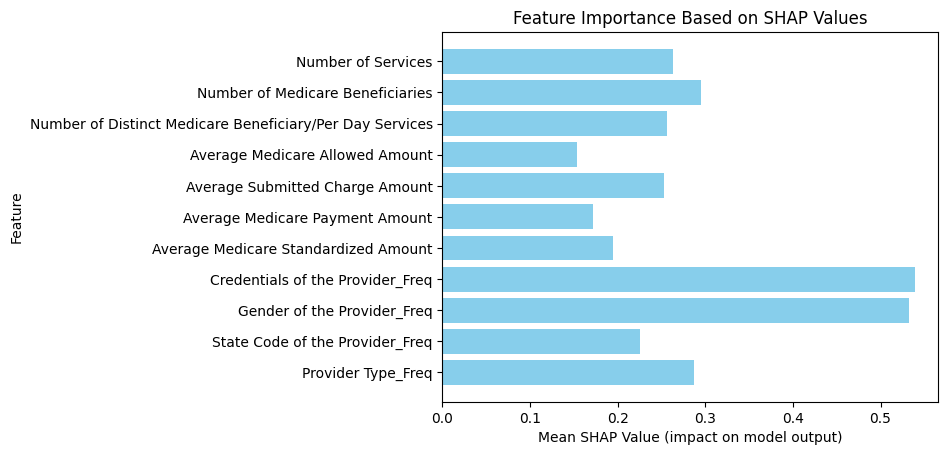

In [34]:
import numpy as np

# Converting SHAP values to numpy array
shap_values_array = np.array(shap_values.values)
shap_values_summary = np.abs(shap_values_array).mean(axis=0)

# Plot of the summarized SHAP values as a stacked bar plot
plt.barh(anomaly_detection_columns, shap_values_summary, color='skyblue')
plt.xlabel('Mean SHAP Value (impact on model output)')
plt.ylabel('Feature')
plt.title('Feature Importance Based on SHAP Values')
plt.gca().invert_yaxis()
plt.show()


<h3>From the above graph, we can see that 'Credentials of the Provider_Freq', and 'Gender of the Provider_Freq' have the highest impact in the model output.</h3>

<h2>Visualization of Anamolies in the 'Credentials of the Provider_Freq' and 'Gender of the Provider_Freq' columns using stacked bar graphs</h2>

One-Class SVM anomalies detected: 5000


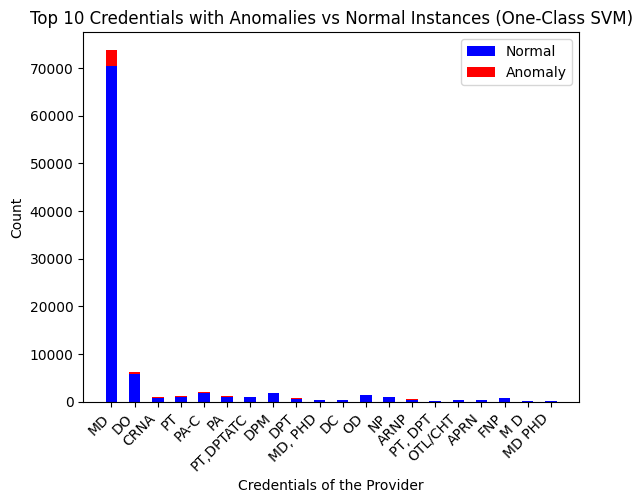

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure One-Class SVM Anomaly Labels are Correctly Applied
one_class_svm = OneClassSVM(gamma='auto', nu=0.05)
one_class_svm.fit(X)
data['OneClassSVM'] = one_class_svm.predict(X)
data['OneClassSVM'] = data['OneClassSVM'].map({1: 0, -1: 1})
print("One-Class SVM anomalies detected:", data['OneClassSVM'].sum())

# Group the data by 'Credentials of the Provider_Freq' and 'OneClassSVM'
credentials_grouped = data.groupby(['Credentials of the Provider_Freq', 'OneClassSVM']).size().unstack().fillna(0)
credentials_grouped.columns = ['Normal', 'Anomaly'] if credentials_grouped.shape[1] == 2 else (['Normal'] if 0 in credentials_grouped.columns else ['Anomaly'])
credentials_grouped = credentials_grouped.reset_index()

#top 10 credentials with most anomalies
top_credentials = credentials_grouped.sort_values(by='Anomaly', ascending=False).head(20)

credentials_mapping = data[['Credentials of the Provider', 'Credentials of the Provider_Freq']].drop_duplicates()
credentials_mapping_dict = credentials_mapping.set_index('Credentials of the Provider_Freq')['Credentials of the Provider'].to_dict()

# Mapping the frequency-encoded values back to the original values for labels
top_credentials['Credentials of the Provider'] = top_credentials['Credentials of the Provider_Freq'].map(credentials_mapping_dict)

# stacked bar plot for 'Credentials of the Provider'
bar_width = 0.5
bars1 = plt.bar(top_credentials['Credentials of the Provider'], top_credentials['Normal'], color='blue', label='Normal', width=bar_width)
bars2 = plt.bar(top_credentials['Credentials of the Provider'], top_credentials['Anomaly'], bottom=top_credentials['Normal'], color='red', label='Anomaly', width=bar_width)
plt.xlabel('Credentials of the Provider')
plt.ylabel('Count')
plt.title('Top 10 Credentials with Anomalies vs Normal Instances (One-Class SVM)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()


<H3>We can see that most anomolies are present with Credential 'MD'</H3>

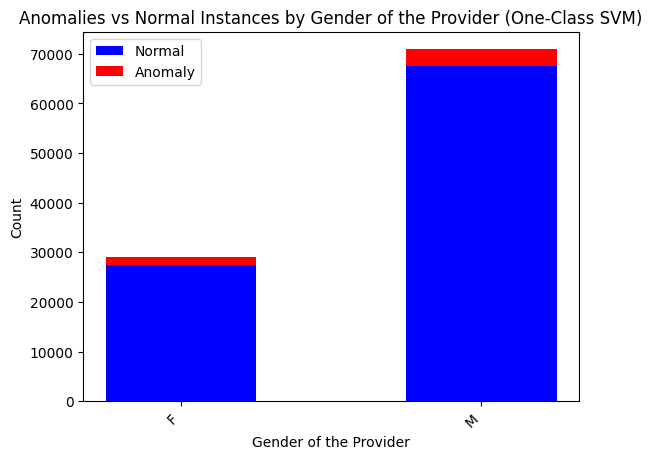

In [38]:
# Grouping the data by 'Gender of the Provider_Freq' and 'OneClassSVM'
gender_grouped = data.groupby(['Gender of the Provider_Freq', 'OneClassSVM']).size().unstack().fillna(0)
gender_grouped.columns = ['Normal', 'Anomaly'] if gender_grouped.shape[1] == 2 else (['Normal'] if 0 in gender_grouped.columns else ['Anomaly'])
gender_grouped = gender_grouped.reset_index()

gender_mapping = data[['Gender of the Provider', 'Gender of the Provider_Freq']].drop_duplicates()
gender_mapping_dict = gender_mapping.set_index('Gender of the Provider_Freq')['Gender of the Provider'].to_dict()

# Mapping the frequency-encoded values back to the original values for labels
gender_grouped['Gender of the Provider'] = gender_grouped['Gender of the Provider_Freq'].map(gender_mapping_dict)

#stacked bar plot for 'Gender of the Provider'
bar_width = 0.5
bars1 = plt.bar(gender_grouped['Gender of the Provider'], gender_grouped['Normal'], color='blue', label='Normal', width=bar_width)
bars2 = plt.bar(gender_grouped['Gender of the Provider'], gender_grouped['Anomaly'], bottom=gender_grouped['Normal'], color='red', label='Anomaly', width=bar_width)
plt.xlabel('Gender of the Provider')
plt.ylabel('Count')
plt.title('Anomalies vs Normal Instances by Gender of the Provider (One-Class SVM)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()


<H3>We can see that more anomolies are present when Gender is Male</H3>